# Figure 10 - Effects of sonophore membrane coverage on neural responses

### Imports

In [1]:
import os
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PySONIC.utils import logger, si_format
from PySONIC.core import NeuronalBilayerSonophore, PulsedProtocol, AcousticDrive
from PySONIC.neurons import getPointNeuron
from MorphoSONIC.core import Node, surroundedSonophore, SectionAcousticSource
from MorphoSONIC.plt import plotTimeseries0Dvs1D
from MorphoSONIC.batches import CoverageTitrationBatch
from utils import saveFigsAsPDF, subdirectory

logger.setLevel(logging.INFO)

### Functions

### Data sub-directory

In [2]:
subdir = subdirectory('coverage')

### Plot parameters

In [3]:
figindex = 10
fs = 12
tracefig_size = (8, 6)
thrfig_size = (6, 5)
figs = {}

### Simulation parameters

In [4]:
pneuron = getPointNeuron('RS')
a = 32e-9       # m
Fdrive = 500e3  # Hz
deff = 100e-9   # m
rs = 1e2        # Ohm.cm

## Panel A: neural responses at 50% coverage

 24/06/2020 21:10:18: Node(CorticalRS, a=32.0 nm, fs=50%): simulation @ f = 500kHz, A = 100.00kPa, tstim = 100ms, toffset = 50ms, tstart = 1ms
 24/06/2020 21:10:18: RadialModel(CorticalRS, innerR32.0nm, outerR45.3nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=100.00kPa), tstim = 100ms, toffset = 50ms, tstart = 1ms


IDA initialization failure, weighted norm of residual=2.44724e+007
IDA initialization failure, weighted norm of residual=7.18193e+006


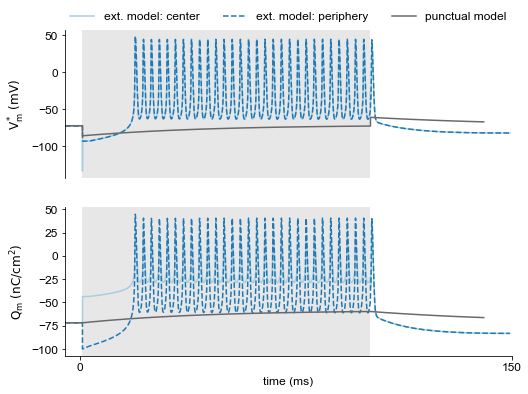

In [5]:
Adrive = 100e3   # kPa
cov = 0.5
drive = AcousticDrive(Fdrive, Adrive)
pp = PulsedProtocol(100e-3, 50e-3, tstart=1e-3)
figs['a'] = plotTimeseries0Dvs1D(pneuron, a, cov, rs, deff, drive, pp, figsize=tracefig_size, fs=fs)

## Panel B: threshold curves

Comparison of excitation threshold amplitudes of the punctual and nanoscale spatially-extended SONIC models for a range of sonophore coverage fractions.**The rendering may take a few seconds...**
 

In [6]:
# Stimulation parameters
pp = PulsedProtocol(1.0, 0.)
drive = AcousticDrive(Fdrive)
source = SectionAcousticSource('center', f=Fdrive)
cov_range = np.linspace(1, 99, 99)
out_key = 'Athr (Pa)'

# Compute threshold amplitudes with point-neuron model
batch0D = CoverageTitrationBatch(
    out_key, '0D',
    lambda fs: Node(pneuron, a=a, fs=fs * 1e-2),
    drive, pp, cov_range, root=subdir)
Athr0D = batch0D.run()

# Compute threshold amplitudes with spatially-extended model
batch1D = CoverageTitrationBatch(
    out_key, '1D',
    lambda fs: surroundedSonophore(pneuron, a, fs * 1e-2, rs, depth=deff),
    source, pp, cov_range, root=subdir)
Athr1D = batch1D.run()

# Plot threshold curves as a function of coverage fraction, for various sub-membrane depths
fig, ax = plt.subplots(figsize=thrfig_size)
ax.set_xlabel('sonophore membrane coverage (%)', fontsize=fs)
ax.set_ylabel('amplitude (kPa)', fontsize=fs)
ax.plot(cov_range, Athr0D * 1e-3, c='dimgrey', label='punctual model')
ax.plot(cov_range, Athr1D * 1e-3, c='C0', label='extended model')
ax.set_yscale('log')
ax.set_xlim(0, 100)
ax.set_ylim(1e1, 6e2)
for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(fs)
ax.legend(frameon=False, fontsize=fs, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=2, mode='expand', borderaxespad=0.)

figs['b'] = fig

 24/06/2020 21:10:19: Computing fs-dependent thresholds for 0D model with AcousticDrive(f=500kHz)
 24/06/2020 21:10:19: Computing fs-dependent thresholds for 1D model with SectionAcousticSource(sec_id=center, f=500kHz)
 24/06/2020 21:10:19: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=120.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=35.981
IDA initialization failure, weighted norm of residual=6.21053e+006
IDA initialization failure, weighted norm of residual=1.01569e+006


 24/06/2020 21:10:24: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=60.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=4.86861e+013
IDA initialization failure, weighted norm of residual=2.709e+006
IDA initialization failure, weighted norm of residual=1.36422e+006


 24/06/2020 21:10:27: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=30.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=6.7713e+013
IDA initialization failure, weighted norm of residual=87574.6
IDA initialization failure, weighted norm of residual=109528


 24/06/2020 21:10:28: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=60.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=5.89307e+012
IDA initialization failure, weighted norm of residual=2.709e+006
IDA initialization failure, weighted norm of residual=1.3618e+006


 24/06/2020 21:10:30: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=45.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=6.758e+013
IDA initialization failure, weighted norm of residual=1.22878e+006
IDA initialization failure, weighted norm of residual=1.3454e+006


 24/06/2020 21:10:32: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=37.50kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=386513
IDA initialization failure, weighted norm of residual=1.17966e+006


 24/06/2020 21:10:33: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=33.75kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=132221
IDA initialization failure, weighted norm of residual=1.08892e+006


 24/06/2020 21:10:34: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=31.87kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=5.60813e+013
IDA initialization failure, weighted norm of residual=109752
IDA initialization failure, weighted norm of residual=966299


 24/06/2020 21:34:09: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=32.81kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=5.00509e+013
IDA initialization failure, weighted norm of residual=120950
IDA initialization failure, weighted norm of residual=1.03975e+006


 24/06/2020 21:39:42: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=33.28kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=5.36232e+013
IDA initialization failure, weighted norm of residual=126576
IDA initialization failure, weighted norm of residual=1.07029e+006


 24/06/2020 21:39:42: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=33.52kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=5.50621e+013
IDA initialization failure, weighted norm of residual=129396
IDA initialization failure, weighted norm of residual=1.08518e+006


 24/06/2020 21:39:43: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=33.63kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=5.57282e+013
IDA initialization failure, weighted norm of residual=130808
IDA initialization failure, weighted norm of residual=1.09363e+006


 24/06/2020 21:39:44: RadialModel(CorticalRS, innerR32.0nm, outerR80.0nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=33.69kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=5.60411e+013
IDA initialization failure, weighted norm of residual=131515
IDA initialization failure, weighted norm of residual=1.04834e+006


 24/06/2020 21:39:44: RadialModel(CorticalRS, innerR32.0nm, outerR77.6nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=120.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=855557
IDA initialization failure, weighted norm of residual=5.47417e+006
IDA initialization failure, weighted norm of residual=1.04051e+006


 24/06/2020 21:39:52: RadialModel(CorticalRS, innerR32.0nm, outerR77.6nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=60.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=2.39346e+006
IDA initialization failure, weighted norm of residual=1.29381e+006


 24/06/2020 21:39:56: RadialModel(CorticalRS, innerR32.0nm, outerR77.6nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=30.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=1.7618
IDA initialization failure, weighted norm of residual=77634.9
IDA initialization failure, weighted norm of residual=97088.1


 24/06/2020 21:39:56: RadialModel(CorticalRS, innerR32.0nm, outerR77.6nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=60.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=2.39346e+006
IDA initialization failure, weighted norm of residual=1.29317e+006


 24/06/2020 21:40:01: RadialModel(CorticalRS, innerR32.0nm, outerR77.6nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=45.00kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=1.08783e+006
IDA initialization failure, weighted norm of residual=1.1503e+006


 24/06/2020 21:40:03: RadialModel(CorticalRS, innerR32.0nm, outerR77.6nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=37.50kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=342527
IDA initialization failure, weighted norm of residual=1.08037e+006


 24/06/2020 21:40:04: RadialModel(CorticalRS, innerR32.0nm, outerR77.6nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=33.75kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=117208
IDA initialization failure, weighted norm of residual=973468


 24/06/2020 21:40:04: RadialModel(CorticalRS, innerR32.0nm, outerR77.6nm, depth100nm, rs1.0e+02Ohm.cm, a=32.0 nm, fs=100%): simulation @ SectionAcousticSource(sec_id=center, f=500kHz, A=31.87kPa), tstim = 1s


IDA initialization failure, weighted norm of residual=97292.1


NEURON: variable step integrator error
 near line 0
 objref hoc_obj_[2]
                   ^
        fadvance()


RuntimeError: hoc error

### Save figure panels

Save figure panels as **pdf** in the *figs* sub-folder:

In [ ]:
saveFigsAsPDF(figs, figindex)